<a href="https://colab.research.google.com/github/raamav/Image-Classification/blob/master/Interpreting_Hand_Gestures_(Signs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpreting Hand Gestures (Hand Signs Recognition with Tensorflow)

This dataset comprises images of hand gestures or signs. These gestures indicate numbers from 0 - 5 which are signaled by a single hand.

[Sample image from the dataset which corresponds to the number "3"](https://drive.google.com/open?id=1wBwU8A5NpOE537JOcwkZKhlvIiJUvDVl)

This dataset is sourced from the [Github page](https://github.com/cs230-stanford/cs230-code-examples/tree/master/pytorch/vision) of the Deep Learning Course (CS 230) offered by Stanford University. This course is taught by Andrew Ng and Kian Katanforoosh.

The dataset comprises 1080 training images (less than 200 images per class) and there are 120 images in the test set.

<BR>


### Results
*TBD*





In [0]:
# Blank

### Loading Data

...

In [5]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"
image_dir = 'signs_dataset/data'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import os

# Changing the working directory

os.chdir(root_dir + image_dir + '/SIGNS' )
os.listdir()

['dev_signs', 'train_signs', 'test_signs']

In [0]:
# Directories for Training, Validation and Test Data
train_dir = 'train_signs'
val_dir = 'dev_signs'
test_dir = 'test_signs'

In [0]:
# CREATING A FUNCTION TO LOAD THE DATA AND PROCESS THE FILENAMES

import glob
import cv2
import numpy as np

def images_filenames(folder_name):
    images = []
    label = []
    for filename in os.listdir(folder_name):
        img = cv2.imread(os.path.join(folder_name,filename))
        if img is not None:
            images.append(img)
            label.append(int(filename[0:1]))

    # convert to numpy
    X = np.asarray(images)
    y = np.asarray(label)
    y = y.reshape(-1,1) # to avoid that rank 1 array issue
    return X,y

In [0]:
# Implementing Function

X_train, y_train = images_filenames(train_dir)
X_val, y_val = images_filenames(val_dir)
X_test, y_test = images_filenames(test_dir)

In [10]:
# Testing Shapes and Datatypes

print("shapes of data\n",X_train.shape,X_val.shape,X_test.shape)
print("shapes of labels\n",y_train.shape,y_val.shape,y_test.shape)

shapes of data
 (864, 64, 64, 3) (216, 64, 64, 3) (120, 64, 64, 3)
shapes of labels
 (864, 1) (216, 1) (120, 1)


### Pre-Processing Data

In [0]:
X_train_s = X_train.copy()
X_val_s = X_val.copy()
X_test_s = X_test.copy()

[3]


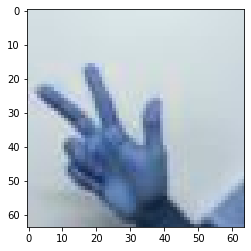

In [45]:
# Plotting a sample image

import matplotlib.pyplot as plt

plt.imshow(X_train_s[100])
print(y_train[100])

In [0]:
# Normalizing Data

X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

[4]


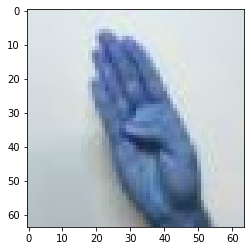

In [46]:
plt.imshow(X_val[10])
print(y_val[10])

### A Basic CNN Model

Loosely based on the AlexNet Architecture

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
# Defining the model architecture

input_point = keras.Input(shape = (64,64,3), name = "img")

x = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = None)(input_point)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Flatten() (x)

x = layers.Dense(1024, activation = 'relu')(x)
x = layers.BatchNormalization() (x)
x = layers.Dropout(rate = 0.15) (x)

x = layers.Dense(256, activation = 'relu')(x)
x = layers.BatchNormalization() (x)
x = layers.Dropout(rate = 0.15) (x)


output = layers.Dense(6, activation = "softmax") (x)

In [68]:
# Create Model and Print Out Archiecture

model = keras.Model(inputs = input_point, outputs = output, name = "AlexNet_sub" )

model.summary()

Model: "AlexNet_sub"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        

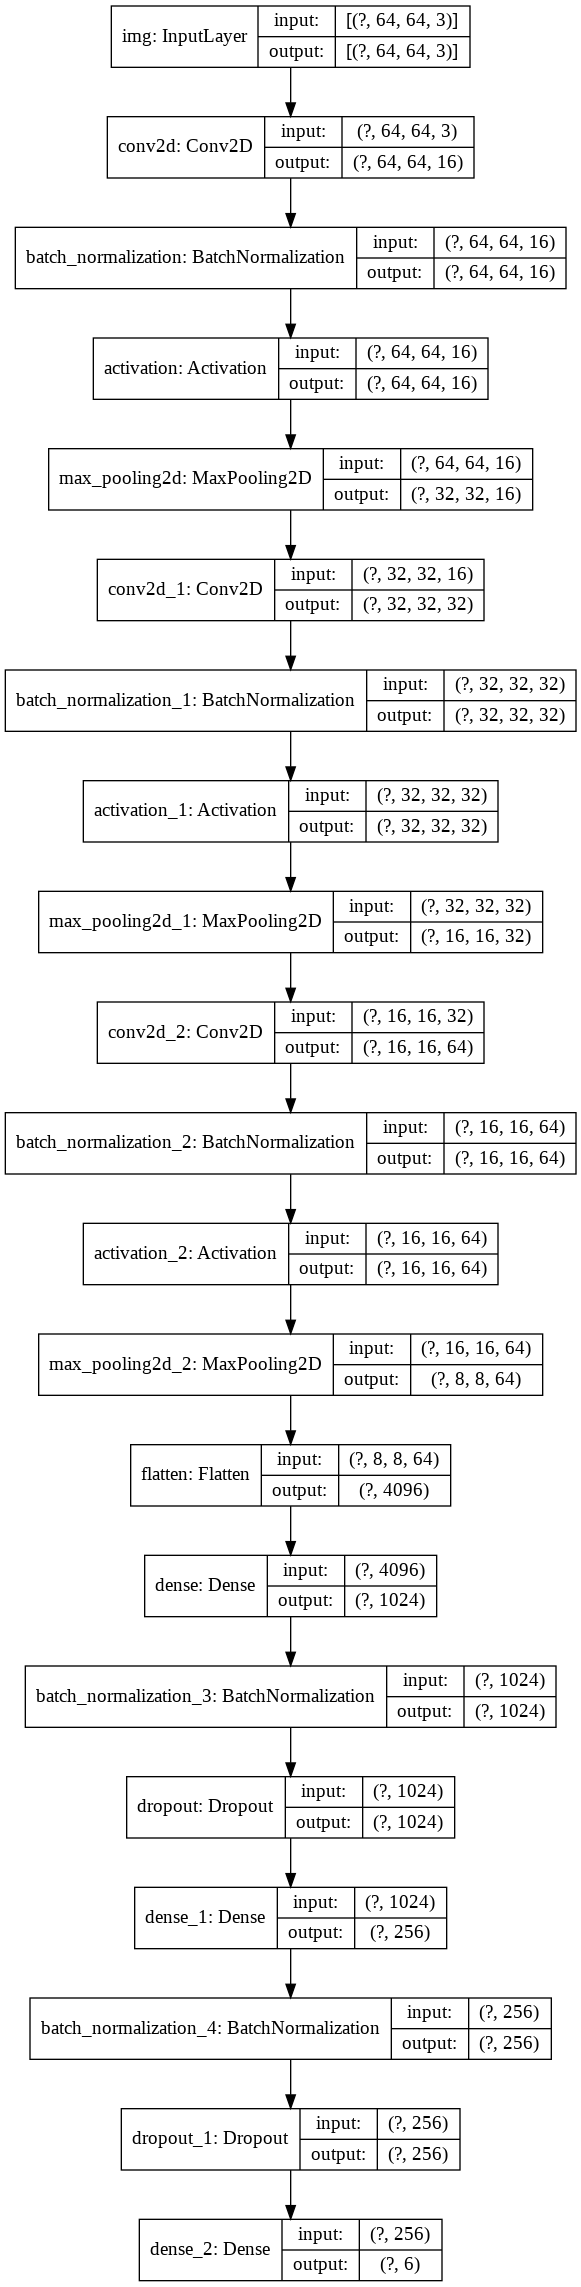

In [69]:
# Plotting the model architecture

keras.utils.plot_model(model, "cifar10_arch.png", show_shapes = True)

In [0]:
# Specifying Optimizer and Loss Functions 
optimizer = keras.optimizers.Adam(learning_rate = 0.00001)

loss = keras.losses.SparseCategoricalCrossentropy()

# IMPLEMENT CALLBACKS

checkpoint_cb = keras.callbacks.ModelCheckpoint("signs1_best.h5",save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 50, restore_best_weights = True)

In [0]:
# Compiling the Model

model.compile(optimizer = optimizer, 
                    loss = loss, 
                    metrics = ['accuracy'])

In [0]:
# Housekeeping

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
# Fitting the model

history = model.fit(X_train, y_train, epochs = 70,
                          validation_data = (X_val,y_val),
                          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/70
27/27 [==============================] - 1s 36ms/step - loss: 2.1542 - accuracy: 0.2315 - val_loss: 1.8070 - val_accuracy: 0.1481
Epoch 2/70
27/27 [==============================] - 0s 16ms/step - loss: 1.4735 - accuracy: 0.4491 - val_loss: 1.8257 - val_accuracy: 0.1435
Epoch 3/70
27/27 [==============================] - 0s 16ms/step - loss: 1.1418 - accuracy: 0.5810 - val_loss: 1.8334 - val_accuracy: 0.1435
Epoch 4/70
27/27 [==============================] - 0s 15ms/step - loss: 0.9234 - accuracy: 0.6898 - val_loss: 1.8539 - val_accuracy: 0.2407
Epoch 5/70
27/27 [==============================] - 0s 15ms/step - loss: 0.7980 - accuracy: 0.7199 - val_loss: 1.8943 - val_accuracy: 0.1944
Epoch 6/70
27/27 [==============================] - 0s 15ms/step - loss: 0.6268 - accuracy: 0.7917 - val_loss: 1.9678 - val_accuracy: 0.1898
Epoch 7/70
27/27 [==============================] - 0s 15ms/step - loss: 0.5997 - accuracy: 0.7928 - val_loss: 2.0543 - val_accuracy: 0.1991
Epoch 8/70
27

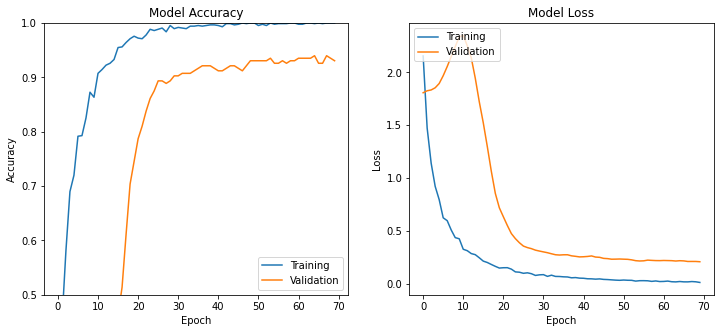

In [74]:
# PLOTS FOR ACCURACY AND LOSS

import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylim([0.5,1])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')

In [75]:
# Inference on the best model
# LOADING THE BEST MODEL

best_model = keras.models.load_model('signs1_best.h5')

best_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.2229 - accuracy: 0.9250


[0.2228689193725586, 0.925000011920929]

Its quite cool that I could get a 93% accuracy on the test set by using a relatively basic CNN Architecture.

<BR>

### Implementing ResNet 50 Architecture

The next step is to implement a ResNet 50 architecture, from scratch.